# 1. How are coefficients affected?

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = load_diabetes()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
df.shape

(442, 11)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=2)

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [10]:
coefs = []
r2_scores = []
for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

Text(0.5, 1.0, 'alpha=1000, r2_score= -0.01')

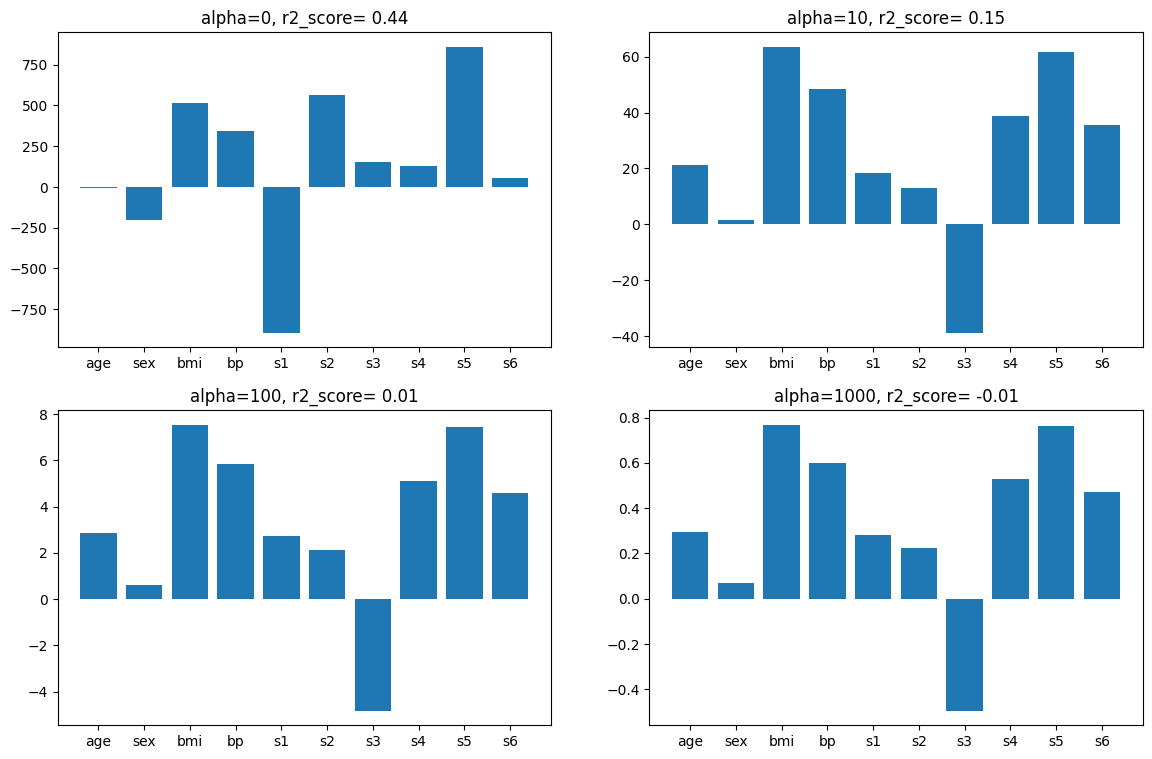

In [13]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('alpha=0, r2_score= {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('alpha=10, r2_score= {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('alpha=100, r2_score= {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title('alpha=1000, r2_score= {}'.format(round(r2_scores[3],2)))


# 2. Higher Coefficient are affected more

In [14]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)

    coefs.append(reg.coef_.tolist())

In [15]:
input_array = np.array(coefs)

In [18]:
coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [33]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [34]:
input_array = np.array(coefs).T

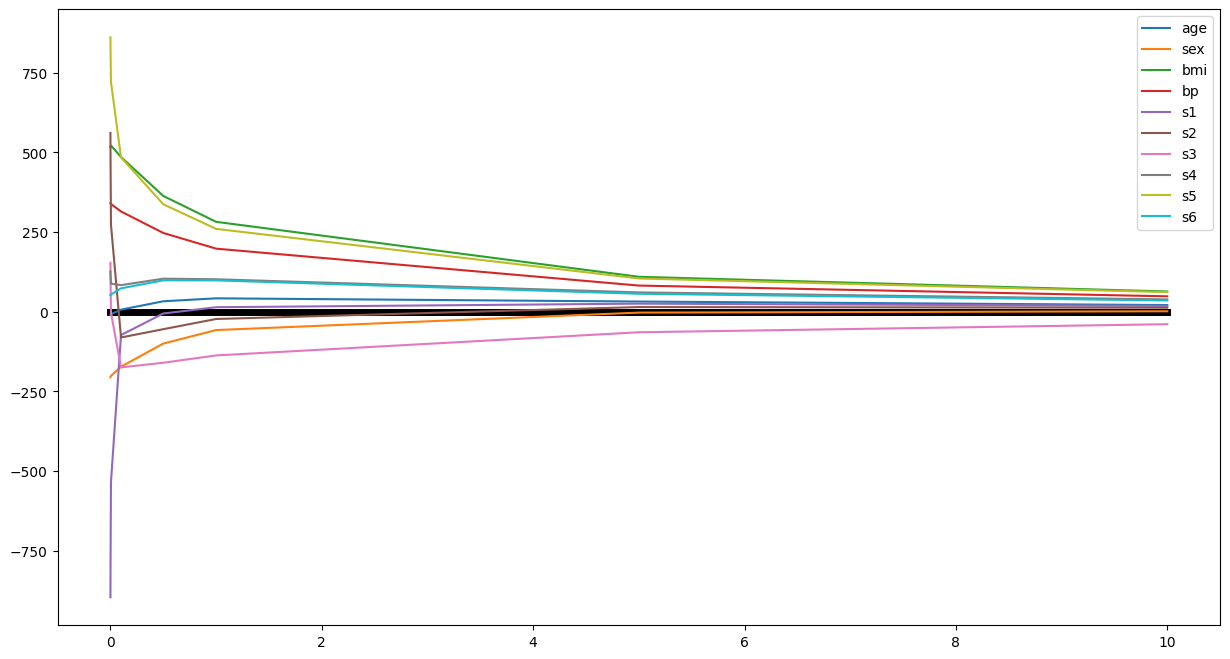

In [26]:
plt.figure(figsize=(15,8))
plt.plot(alphas, np.zeros(len(alphas)),color='black', linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas, input_array[i], label=data.feature_names[i])
plt.legend()

# 3. Impact on Bias and Variance

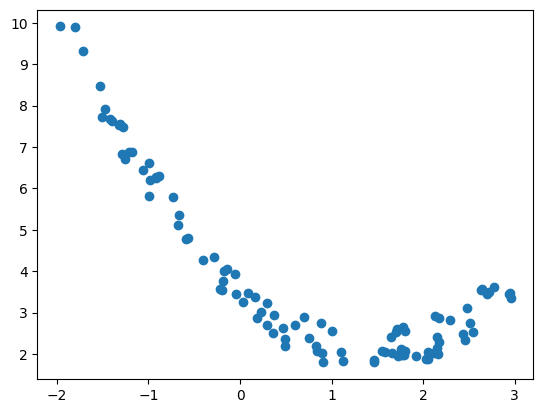

In [71]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.rand(m,1)
# print(X)
# print(y)
plt.scatter(X,y)
plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100,1), y.reshape(100), test_size=0.2, random_state=2)

In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [74]:
X_train[0]

array([1.00000000e+00, 1.70028952e+00, 2.89098444e+00, 4.91551054e+00,
       8.35779104e+00, 1.42106645e+01, 2.41622438e+01, 4.10828099e+01,
       6.98526710e+01, 1.18769764e+02, 2.01942985e+02, 3.43361540e+02,
       5.83814028e+02, 9.92652871e+02, 1.68779727e+03, 2.86974401e+03])

In [81]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=100
    )
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

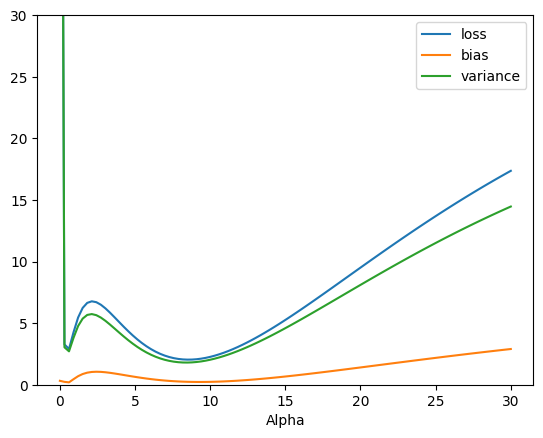

In [83]:
plt.plot(alphas, loss, label='loss')
plt.plot(alphas, bias, label='bias')
plt.plot(alphas, variance, label='variance')
plt.ylim(0,30)
plt.xlabel('Alpha')
plt.legend()

# 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


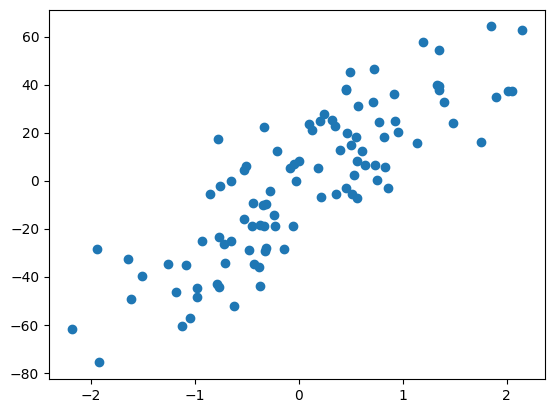

In [85]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [86]:
def cal_loss(m, alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m


In [87]:
def predict(m):
    return m*X - 2.29

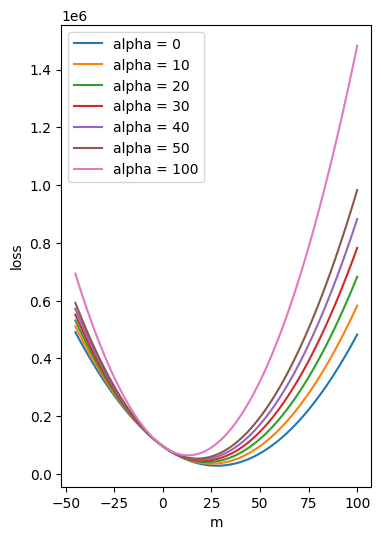

In [90]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i], j)
        loss.append(loss_i)
    plt.plot(m, loss, label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('loss')
plt.show()